<a href="https://colab.research.google.com/github/NataliaBlueCloud/Inband_telemetry_design/blob/main/Cochrams_ofc_example_3paths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("simmer")
install.packages("SciViews")
install.packages("igraph")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘ellipse’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(simmer)
library(SciViews)
library(igraph)
library(readxl)
library(ggplot2)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [3]:
library("googledrive")
if (file.exists("/usr/local/lib/python3.10/dist-packages/google/colab/_ipython.py")){
  install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check)
  options(rlang_interactive=TRUE)
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’


Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.2 (2022-06-13 22:00:14 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.25.0 (2022-06-12 02:20:02 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following object is masked from ‘package:igraph’:

    hierarchy


The following object is masked from ‘package:simmer’:

    clone


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.12.2 (2022-11-11 22:00:03 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following objects are masked from ‘package:simmer’:

    reset, wrap


The fo

In [4]:
drive_auth(use_oob = TRUE, cache = TRUE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=8c6c810c020144a4768a3306990fd2f6&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYa0RzNmVTMFVaZXNaeDV6bTJaNndNZVdWWk90R2dTVk9BQnd5WVVCd0NfN0tBMkZDN1B6ZFNjckdZd3IyZ2FqUSIsInN0YXRlIjoiOGM2YzgxMGMwMjAxNDRhNDc2OGEzMzA2OTkwZmQyZjYifQ==


In [5]:

drive_download("r_traffic_simulation/func/igraph_function_base.R")
drive_download("r_traffic_simulation/func/igraph_functions.R")
drive_download("r_traffic_simulation/func/general_function_base.R")
#drive_download("r_traffic_simulation/func/simmer_function_base.R")

File downloaded:

• igraph_function_base.R <id: 1jwogeGEqQc27cQAu8fiA1mF-KI9C41pm>

Saved locally as:

• igraph_function_base.R

File downloaded:

• igraph_functions.R <id: 1Vyg5nvBWPkMzuajVkyFELct6G1qmjMdP>

Saved locally as:

• igraph_functions.R

File downloaded:

• general_function_base.R <id: 18dycCYyQDWXi1dDVj22EoJWkeYQy-9qg>

Saved locally as:

• general_function_base.R



In [6]:
drive_download("r_traffic_simulation/input_files/Metro_topology_full_Milano.xlsx")


File downloaded:

• Metro_topology_full_Milano.xlsx <id: 1qf9aV3AICULgJEx2D98nInZwKnW8D7dn>

Saved locally as:

• Metro_topology_full_Milano.xlsx



In [7]:
source("igraph_function_base.R")
source("igraph_functions.R")
source("general_function_base.R")

In [8]:
file_name <- "Metro_topology_full_Milano.xlsx"

In [9]:
nodes_info <- read_excel(file_name, sheet = 1)
links_info <- read_excel(file_name, sheet = 2)


#M/M/1 model

##Input data

In [10]:
N = 1250 #packet size (B)
CapacityGbps = 10 #Gbps

In [230]:
create_graph_object <- function(links_info, nodes_info, CapacityGbps,  N = 1250) {
  g <- graph.data.frame(links_info, directed = TRUE, vertices = nodes_info)
  E(g)$capacityGbps <- CapacityGbps
  E(g)$Capacity <- E(g)$capacityGbps*10^9/(8*N)
  E(g)$Distance <- E(g)$distanceKm*4
  E(g)$Definition <- paste0(get.edgelist(g)[,1],"->",get.edgelist(g)[,2])

  return(g)
}


g <- create_graph_object(links_info, nodes_info, CapacityGbps,  N)



In [231]:
################################plot graph

V(g)$color <- "grey"
V(g)$node_type <- "Access CO"
V(g)$color[47] <- "yellow" #source node
V(g)$node_type[47] <- "Access CO (source)"
V(g)$color[c(10,11,12,13,14,15,16,17,18,19)] <- "green" # National COs
V(g)$node_type[c(10,11,12,13,14,15,16,17,18,19)] <- "National CO"
E(g)$color <- "grey"

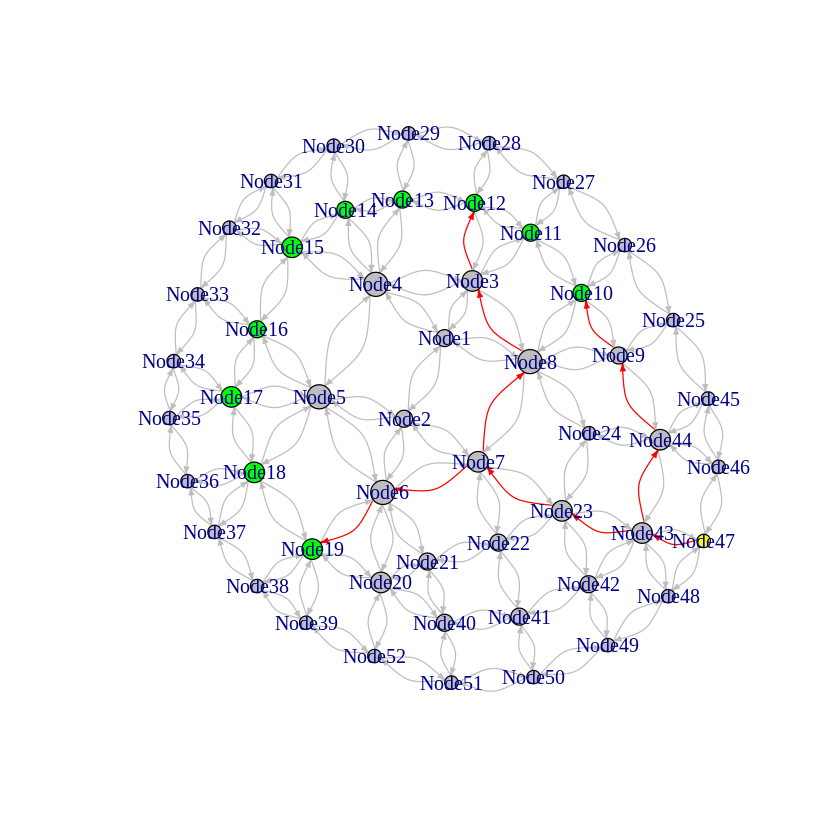

In [232]:

path_1 <- shortest_paths(g, 47, 10, weights = NULL, output = "both", algorithm = c("automatic"))
path_1 <- E(g)[path_1[["epath"]][[1]]]
E(g)$color[path_1] <- "red"

path_2 <- shortest_paths(g, 47, 19, weights = NULL, output = "both", algorithm = c("automatic"))
path_2 <- E(g)[path_2[["epath"]][[1]]]
E(g)$color[path_2] <- "red"


path_3 <- shortest_paths(g, 47, 12, weights = NULL, output = "both", algorithm = c("automatic"))
path_3 <- E(g)[path_3[["epath"]][[1]]]
E(g)$color[path_3] <- "red"


deg <- degree(g, mode="all")
V(g)$size <- 1 + deg*1.3/2
l <- layout.auto(g)
edge_indices <- c(path_1, path_2, path_3)

E(g)$arrow_sizes <- 0.3
E(g)$arrow_sizes[edge_indices] <- 0.7
plot(g, edge.arrow.size = E(g)$arrow_sizes, vertex.label = V(g)$name, edge.curved = 0.5, layout = l)


In [233]:
E(g)$Load <- runif(length(E(g)), 0.1, 0.95)

There are 3 paths:

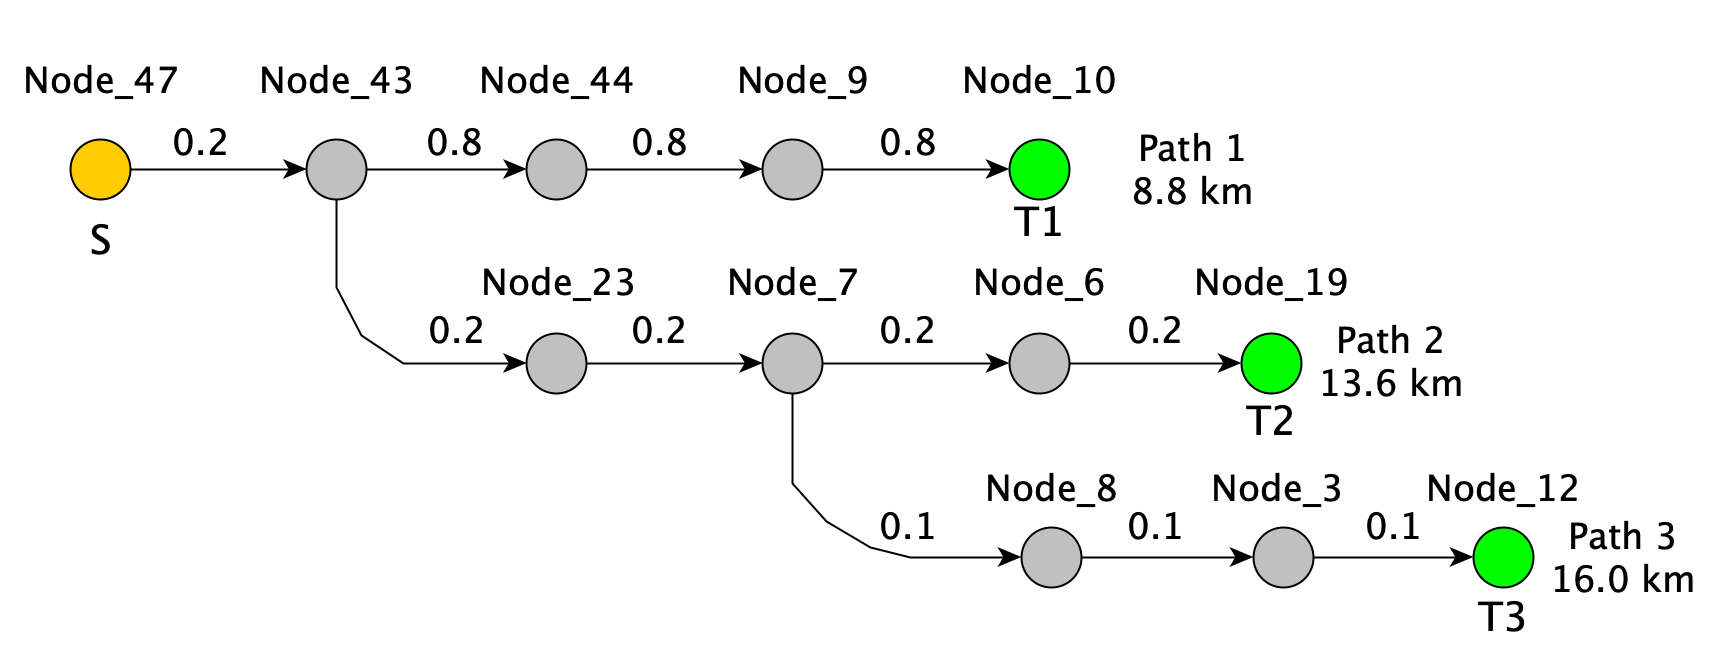

In [234]:
Load_p1 <- c(0.2,0.8,0.8,0.8)
Load_p2 <- c(0.2,0.2,0.2,0.2,0.2)
Load_p3 <- c(0.2,0.2,0.2,0.1,0.1,0.1)


In [235]:
E(g)$Load[path_1] <- Load_p1
E(g)$Load[path_2] <- Load_p2
E(g)$Load[path_3] <- Load_p3


In [236]:
print(paste("Distance path 1",sum(E(g)$Distance[path_1]), "km"))
print(paste("Distance path 2",sum(E(g)$Distance[path_2]), "km"))
print(paste("Distance path 3",sum(E(g)$Distance[path_3]), "km"))

[1] "Distance path 1 8.8 km"
[1] "Distance path 2 13.6 km"
[1] "Distance path 3 16 km"


## Queuing and propagation delays

In [237]:
############################################################
########################load and delays calculations MM1

traffic_delays_calc <- function(g) {
  E(g)$Traffic <- E(g)$Capacity*E(g)$Load

  E(g)$Ni = E(g)$Load/(1-E(g)$Load) # average number of packets in each system
  E(g)$Queue_Delay <- ifelse(E(g)$Traffic == 0, 0, E(g)$Ni/E(g)$Traffic)
  E(g)$Prop_Delay <- 5*10^(-6)*E(g)$Distance
  return(g)
}
g <- traffic_delays_calc(g)

In [238]:
rexp_for_pop <- function(rate){
  pop_number = 50000
  return(rexp(n=pop_number,rate))
}


In [239]:
mm1_path_simulation <- function(g, path){
  x <- 1/E(g)$Queue_Delay[path]
  traffic_path <-  lapply(x, rexp_for_pop)
  return(traffic_path)
  }

##Simulation of 50k population

###Path 1

In [240]:
x <- 1/E(g)$Queue_Delay[path_1]
traffic_path_1 <-  lapply(x, rexp_for_pop)
path1_delays <- Reduce("+", traffic_path_1) + sum(E(g)$Prop_Delay[path_1])
path1_delays_us <- path1_delays*1e6# in uprint(path1_delays_us[1:10])
mean(path1_delays_us)

[1] 60.19284

###Path 2

In [241]:
x <- 1/E(g)$Queue_Delay[path_2]
traffic_path_2 <-  lapply(x, rexp_for_pop)
path2_delays <- Reduce("+", traffic_path_2) + sum(E(g)$Prop_Delay[path_2])
path2_delays_us <- path2_delays*1e6# in uprint(path1_delays_us[1:10])print(path2_delays_us[1:10])
mean(path2_delays_us)

[1] 74.27039

###Path 3

In [242]:
x <- 1/E(g)$Queue_Delay[path_3]
traffic_path_3 <-  lapply(x, rexp_for_pop)
path3_delays <- Reduce("+", traffic_path_3) + sum(E(g)$Prop_Delay[path_3])
path3_delays_us <- path3_delays*1e6# in uprint(path1_delays_us[1:10])print(path3_delays_us[1:10])
mean(path3_delays_us)

[1] 87.09988

###PDF function of delays

Warning message:
“Removed 9 rows containing non-finite values (`stat_density()`).”


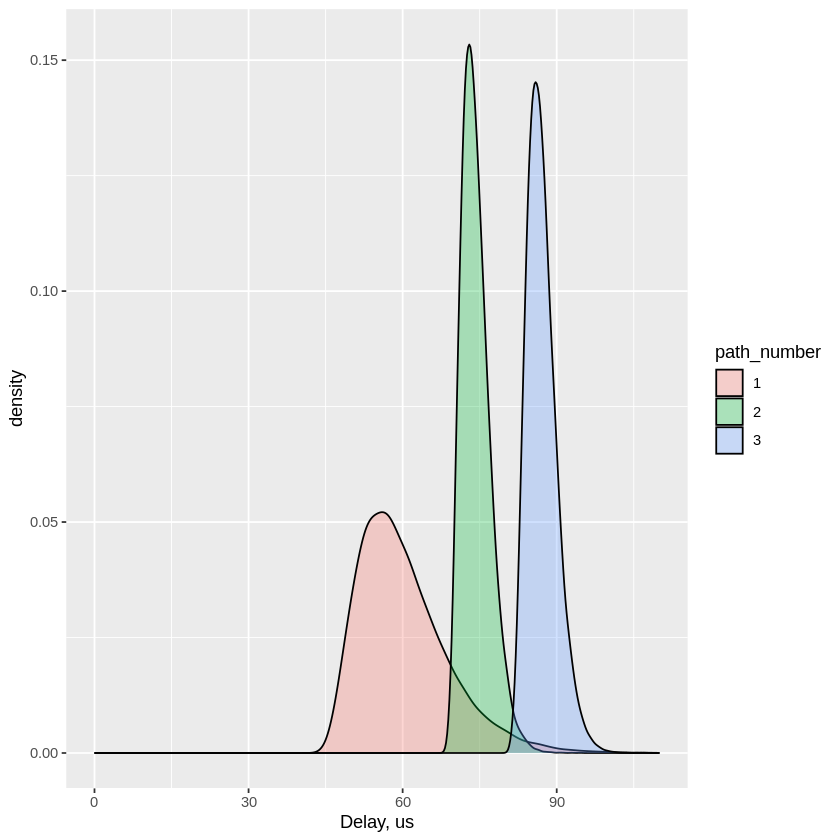

In [243]:
df <- data.frame(delay_value = c(path1_delays_us,path2_delays_us,path3_delays_us),
path_number = c(rep("1",length(path1_delays_us)),rep("2",length(path2_delays_us)),rep("3",length(path3_delays_us))))

p1 <- ggplot(data=df, aes(x=delay_value, group=path_number, fill=path_number)) +
  geom_density(adjust=1.5, alpha=.3) + xlab("Delay, us") + xlim(0, 110)

p1

##Results

In [244]:
threshold_us <- 75 #us

In [245]:
n_exp <- 100

In [246]:
table_to_df <- function(path_delays, threshold_us){
  df_p <- as.data.frame(table(path_delays*1e6<threshold_us, useNA = "always"))
  df_p$Var1 <- as.logical(df_p$Var1)
  df_p$Var1[2] = ifelse(df_p$Var1[1] == 1, 0, 1)
  return(df_p)
}

In [310]:
calc_results <- function(traffic_path_1, traffic_path_2,traffic_path_3, g, threshold_us,n_samples, n_exp)
{
  results <- c()
  percent_below_thr_p1 <- c()
  percent_below_thr_p2 <- c()
  percent_below_thr_p3 <- c()

  for (exp in 1:n_exp)
  {
    path1_delays = sum(E(g)$Prop_Delay[path_1]) +
      sample(traffic_path_1[[1]], size=n_samples, replace=F) +
      sample(traffic_path_1[[2]], size=n_samples, replace=F) +
      sample(traffic_path_1[[3]], size=n_samples, replace=F) +
      sample(traffic_path_1[[4]], size=n_samples, replace=F) # in s
    path2_delays = sum(E(g)$Prop_Delay[path_2]) +
      sample(traffic_path_2[[1]], size=n_samples, replace=F) +
      sample(traffic_path_2[[2]], size=n_samples, replace=F) +
      sample(traffic_path_2[[3]], size=n_samples, replace=F) +
      sample(traffic_path_2[[4]], size=n_samples, replace=F) +
      sample(traffic_path_2[[5]], size=n_samples, replace=F) # in s
    path3_delays = sum(E(g)$Prop_Delay[path_3]) +
      sample(traffic_path_3[[1]], size=n_samples, replace=F) +
      sample(traffic_path_3[[2]], size=n_samples, replace=F) +
      sample(traffic_path_3[[3]], size=n_samples, replace=F) +
      sample(traffic_path_3[[4]], size=n_samples, replace=F) +
      sample(traffic_path_3[[5]], size=n_samples, replace=F) +
      sample(traffic_path_3[[6]], size=n_samples, replace=F) # in s

    percent_below_thr_p1[exp] <- length(path1_delays[path1_delays*1e6 < threshold_us])/length(path1_delays)*100
    percent_below_thr_p2[exp] <- length(path2_delays[path2_delays*1e6 < threshold_us])/length(path2_delays)*100
    percent_below_thr_p3[exp] <- length(path3_delays[path3_delays*1e6 < threshold_us])/length(path3_delays)*100

    df_p1 <- table_to_df(path1_delays, threshold_us)
    df_p1 <- df_p1[order(df_p1$Var1),]
    df_p2 <- table_to_df(path2_delays, threshold_us)
    df_p2 <- df_p2[order(df_p2$Var1),]
    df_p3 <- table_to_df(path3_delays, threshold_us)
    df_p3 <- df_p3[order(df_p3$Var1),]
    table_res <-c(df_p1$Freq[2],df_p2$Freq[2],df_p3$Freq[2])
    max_indexes <- as.vector(which(table_res == max(table_res)))
    max_index <- ifelse(length(max_indexes) > 1, sample(max_indexes, 1), max_indexes)
    results[exp] <- max_index
  }
  print("% below threshold:")
  print(mean(percent_below_thr_p1[exp]))
  print(mean(percent_below_thr_p2[exp]))
  print(mean(percent_below_thr_p3[exp]))
  print("mean:")
  print(mean(path1_delays)*1e6)
  print(mean(path2_delays)*1e6)
  print(mean(path3_delays)*1e6)
  return(list(results,percent_below_thr_p1,percent_below_thr_p2,percent_below_thr_p3))
}

In [324]:
c(results_10p, percent_below_thr_p1_10p, percent_below_thr_p2_10p ,percent_below_thr_p3_10p) := calc_results(traffic_path_1, traffic_path_2,traffic_path_3, g, threshold_us, n_samples = 10, n_exp)

[1] "% below threshold:"
[1] 100
[1] 90
[1] 0
[1] "mean:"
[1] 54.98275
[1] 73.37225
[1] 87.23497
[1] "P% optimal path 1"


[1] 93

[1] "P% optimal path 2"


[1] 7

[1] "P% optimal path 3"


[1] 0

In [317]:
c(results_41p, percent_below_thr_p1_41p, percent_below_thr_p2_41p ,percent_below_thr_p3_41p) := calc_results(traffic_path_1, traffic_path_2,traffic_path_3, g, threshold_us, n_samples = 41, n_exp)

[1] "% below threshold:"
[1] 97.56098
[1] 73.17073
[1] 0
[1] "mean:"
[1] 57.98943
[1] 73.41314
[1] 87.14239


In [316]:
c(results_164p, percent_below_thr_p1_164p, percent_below_thr_p2_164p ,percent_below_thr_p3_164p) := calc_results(traffic_path_1, traffic_path_2,traffic_path_3, g, threshold_us, n_samples =164, n_exp)

[1] "% below threshold:"
[1] 92.68293
[1] 66.46341
[1] 0
[1] "mean:"
[1] 60.00844
[1] 74.01492
[1] 86.98873


In [318]:
c(results_452p, percent_below_thr_p1_452p, percent_below_thr_p2_452p , percent_below_thr_p3_452p) := calc_results(traffic_path_1, traffic_path_2,traffic_path_3, g, threshold_us, n_samples = 452, n_exp)

[1] "% below threshold:"
[1] 93.14159
[1] 68.14159
[1] 0
[1] "mean:"
[1] 60.44062
[1] 74.15146
[1] 87.06553


In [319]:
c(results_50kp, percent_below_thr_p1_50kp, percent_below_thr_p2_50kp ,percent_below_thr_p3_50kp) := calc_results(traffic_path_1, traffic_path_2,traffic_path_3, g, threshold_us, n_samples = 50000, n_exp = 1)

[1] "% below threshold:"
[1] 93.618
[1] 65.44
[1] 0
[1] "mean:"
[1] 60.19284
[1] 74.27039
[1] 87.09988


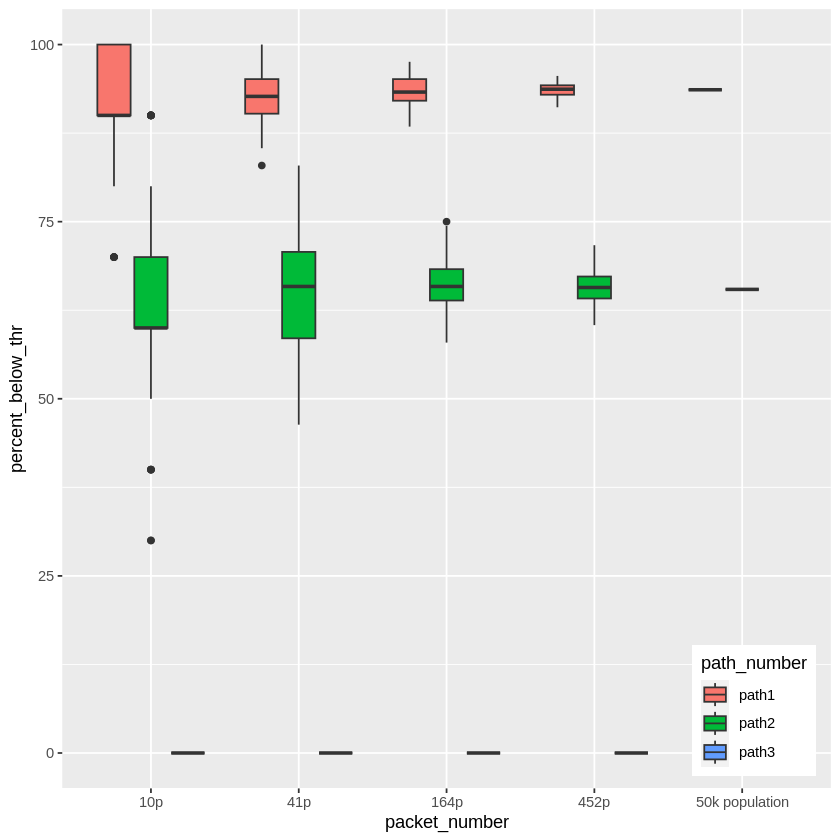

In [320]:
path_number_41p = c(rep("path1",length(percent_below_thr_p1_41p)),rep("path2",length(percent_below_thr_p2_41p)), rep("path3",length(percent_below_thr_p3_41p)))
path_number_10p = c(rep("path1",length(percent_below_thr_p1_10p)),rep("path2",length(percent_below_thr_p2_10p)), rep("path3",length(percent_below_thr_p3_10p)))
path_number_164p = c(rep("path1",length(percent_below_thr_p1_164p)),rep("path2",length(percent_below_thr_p2_164p)), rep("path3",length(percent_below_thr_p3_164p)))
path_number_452p = c(rep("path1",length(percent_below_thr_p1_452p)),rep("path2",length(percent_below_thr_p2_452p)), rep("path3",length(percent_below_thr_p3_452p)))
path_number_50kp = c(rep("path1",length(percent_below_thr_p1_50kp)),rep("path2",length(percent_below_thr_p2_50kp)), rep("path3",length(percent_below_thr_p3_50kp)))


data=data.frame(percent_below_thr = c(percent_below_thr_p1_10p,percent_below_thr_p2_10p,percent_below_thr_p3_10p,
percent_below_thr_p1_41p, percent_below_thr_p2_41p, percent_below_thr_p3_41p,
percent_below_thr_p1_164p, percent_below_thr_p2_164p, percent_below_thr_p3_164p,
percent_below_thr_p1_452p, percent_below_thr_p2_452p, percent_below_thr_p3_452p,
percent_below_thr_p1_50kp, percent_below_thr_p2_50kp, percent_below_thr_p3_50kp),
 path_number = c(path_number_10p, path_number_41p, path_number_164p,path_number_452p, path_number_50kp),
 packet_number = c(rep("10p",length(path_number_10p)),rep("41p",length(path_number_41p)),rep("164p",length(path_number_164p)),rep("452p",length(path_number_452p)),rep("50k population",length(path_number_50kp)) ))

# grouped boxplot

data$packet_number <- factor(data$packet_number , levels=c("10p", "41p", "164p", "452p", "50k population"))
ggplot(data, aes(x=packet_number, y=percent_below_thr, fill=path_number)) + geom_boxplot() + theme(legend.position = c(0.9, 0.1))

In [328]:
threshold_us <- 85 #us
c(results_10p, percent_below_thr_p1_10p, percent_below_thr_p2_10p ,percent_below_thr_p3_10p) := calc_results(traffic_path_1, traffic_path_2,traffic_path_3, g, threshold_us, n_samples = 10, n_exp)
c(results_41p, percent_below_thr_p1_41p, percent_below_thr_p2_41p ,percent_below_thr_p3_41p) := calc_results(traffic_path_1, traffic_path_2,traffic_path_3, g, threshold_us, n_samples = 41, n_exp)
c(results_164p, percent_below_thr_p1_164p, percent_below_thr_p2_164p ,percent_below_thr_p3_164p) := calc_results(traffic_path_1, traffic_path_2,traffic_path_3, g, threshold_us, n_samples =164, n_exp)
c(results_452p, percent_below_thr_p1_452p, percent_below_thr_p2_452p , percent_below_thr_p3_452p) := calc_results(traffic_path_1, traffic_path_2,traffic_path_3, g, threshold_us, n_samples = 452, n_exp)
c(results_50kp, percent_below_thr_p1_50kp, percent_below_thr_p2_50kp ,percent_below_thr_p3_50kp) := calc_results(traffic_path_1, traffic_path_2,traffic_path_3, g, threshold_us, n_samples = 50000, n_exp = 1)


[1] "% below threshold:"
[1] 100
[1] 100
[1] 20
[1] "mean:"
[1] 63.99065
[1] 74.35699
[1] 86.61385
[1] "% below threshold:"
[1] 100
[1] 100
[1] 29.26829
[1] "mean:"
[1] 60.61975
[1] 74.39076
[1] 86.98042
[1] "% below threshold:"
[1] 99.39024
[1] 99.39024
[1] 18.29268
[1] "mean:"
[1] 59.8358
[1] 74.42566
[1] 87.28674
[1] "% below threshold:"
[1] 98.45133
[1] 99.11504
[1] 26.54867
[1] "mean:"
[1] 60.31879
[1] 74.42792
[1] 86.96477
[1] "% below threshold:"
[1] 98.602
[1] 99.75
[1] 25.082
[1] "mean:"
[1] 60.19284
[1] 74.27039
[1] 87.09988


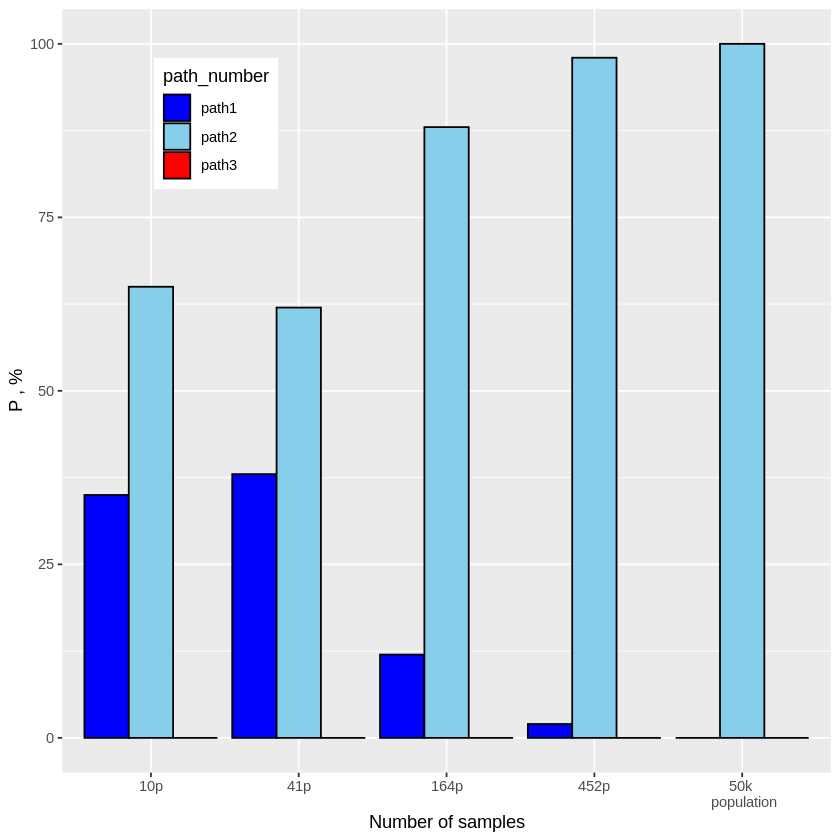

In [329]:
data=data.frame(value = c(length(results_10p[results_10p == 1])*100/n_exp,length(results_10p[results_10p == 2])*100/n_exp,length(results_10p[results_10p == 3])*100/n_exp,
                          length(results_41p[results_41p == 1])*100/n_exp,length(results_41p[results_41p == 2])*100/n_exp,length(results_41p[results_41p == 3])*100/n_exp,
                          length(results_164p[results_164p == 1])*100/n_exp,length(results_164p[results_164p == 2])*100/n_exp,length(results_164p[results_164p == 3])*100/n_exp,
                          length(results_452p[results_452p == 1])*100/n_exp,length(results_452p[results_452p == 2])*100/n_exp,length(results_452p[results_452p == 3])*100/n_exp,
                          length(results_50kp[results_50kp == 1])*100,length(results_50kp[results_50kp == 2])*100,length(results_50kp[results_50kp == 3])*100),
                path_number = c("path1","path2","path3",
                                "path1","path2","path3",
                                "path1","path2","path3",
                                "path1","path2","path3",
                                "path1","path2","path3"),
                packet_number = c(rep("10p",3),rep("41p",3),rep("164p",3),rep("452p",3),rep("50k \n population",3)))
data$packet_number <- factor(data$packet_number , levels=c("10p", "41p", "164p", "452p", "50k \n population"))

# grouped boxplot
ggplot(data, aes(x=packet_number, y=value, fill=path_number)) +
  geom_bar(stat = "identity",position=position_dodge(), size = 0.5, color = "black") +
  scale_fill_manual(values = c("blue" , "skyblue", "red") )  + ylab("P , %") +
  xlab("Number of samples")  +  theme(legend.position = c(0.2, 0.85))

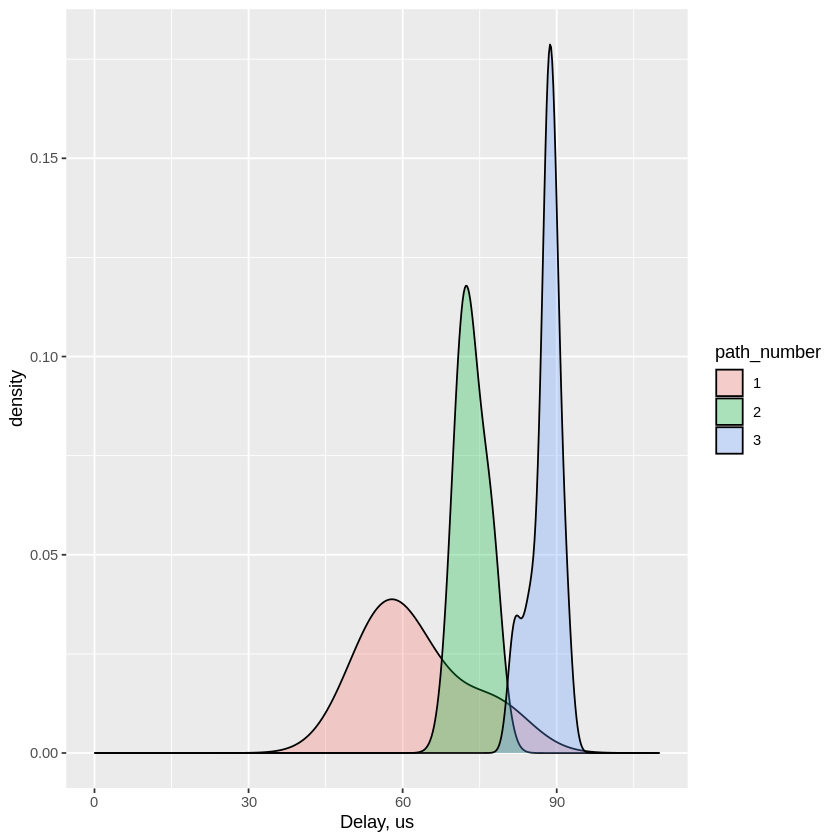

In [331]:
df <- data.frame(delay_value = c(path1_delays,path2_delays,path3_delays),
path_number = c(rep("1",length(path1_delays)),rep("2",length(path2_delays)),rep("3",length(path3_delays))))

p1 <- ggplot(data=df, aes(x=delay_value*1e6, group=path_number, fill=path_number)) +
  geom_density(adjust=1.5, alpha=.3) + xlim(0, 110) + xlab("Delay, us")

p1